# Birdcall identification exploratory data analysis 
## File and data exploration
First we'll explore the different type of files that are provided to use through the cornell dataset, we can distinguish between csv files that contain sound metadata and mp3 that contain the sound of the birds.

In [11]:
import pandas as pd # csv reading and metadata parsing 
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # for data analysis and plotting 
import librosa # mp3 reading 
import utils # utility functions and file/path variables

#### Sample submission 
As a sample submission we have a csv that contains two cols. In each row we must specify which 
birds are singing, the quantity of birds can vary from 0 to n where n is the number of classes, 
although it might be very improbable

In [4]:
sample_sub = pd.read_csv(utils.sample_submission_file)
sample_sub

,row_id,birds
0,site_1_0a997dff022e3ad9744d4e7bbf923288_5,nocall
1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,nocall
2,site_1_0a997dff022e3ad9744d4e7bbf923288_15,nocall


#### Train metadata
For the train metadata we have a lot of variables, variables such as channels, date, rating, are self explainable, others such as playback_used and url don't seem to have a real value to the training. For the training we must make a selection of the importance of specific variables based on the few that are provided in the test set. The most important variable is the ebird_code, this code identifies a specific bird. Each training sample can only contain a single bird due to the small size of the sample, on the other hand the test set might contain very large sequences of data. Concequently we must find a way to dividie the data into smaller, more managable chunks. Following we analyse some specific features more deeply


In [5]:
train_meta = pd.read_csv(utils.train_file)
train_meta

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21370,4.5,no,yetvir,1 (mono),2019-05-15,both,28,XC477608.mp3,level,Yellow-throated Vireo,...,477608,https://www.xeno-canto.org/477608,United States,Sue Riffe,Vireo flavifrons_Yellow-throated Vireo,-84.0131,0-3(s),13:00,Sue Riffe,Creative Commons Attribution-NonCommercial-Sha...
21371,3.5,no,yetvir,1 (mono),2017-05-14,Not specified,52,XC500348.mp3,Not specified,Yellow-throated Vireo,...,500348,https://www.xeno-canto.org/500348,United States,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,15:00,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...
21372,5.0,no,yetvir,1 (mono),2017-06-10,Not specified,96,XC501230.mp3,Not specified,Yellow-throated Vireo,...,501230,https://www.xeno-canto.org/501230,United States,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,13:30,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...
21373,3.5,no,yetvir,2 (stereo),2009-05-06,level,35,XC54828.mp3,level,Yellow-throated Vireo,...,54828,https://www.xeno-canto.org/54828,United States,Mike Nelson,Vireo flavifrons_Yellow-throated Vireo,-83.9462,>10(s),9:45am,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [7]:
print(len(train_meta.columns))
print(train_meta.columns)

35
Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license'],
      dtype='object')


In [12]:
bird_codes = train_meta['ebird_code']
total_files = len(bird_codes)
print('Total train files:', total_files)

Total train files: 21375


As of the total train files we have 21375 files, from which we have the following distribution. The distribution is really disperse with a standard deviation of 25.72, we can see that there at most 100 samples with the same category, the mean is relatively high considering that the minimum number of samples is of 9. There are a total of **264** total bird codes. 

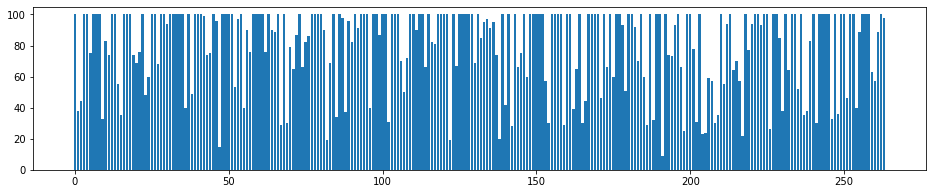

In [16]:
codes_count = {}
for d in bird_codes:
    d = d.split('-')[0]
    if d in codes_count:
        codes_count[d] += 1 
    else:
        codes_count[d] = 1 

values = [codes_count[k] for k in sorted(codes_count.keys())]
total_codes = np.arange(len(codes_count))
fig = plt.figure(figsize=(16, 3))
plt.bar(total_codes, values)
plt.show()

In [22]:
values = np.array(values)
print('Total bird codes:', len(total_codes))
print('Mean count:', values.mean())
print('Variance:', values.var())
print('Standard deviation:', values.std())
print('Min:', values.min())
print('Max:', values.max())

Total bird codes: 264
Mean count: 80.9659090909091
Variance: 661.9344438705234
Standard deviation: 25.728086673332772
Min: 9
Max: 100


#### Test metadata
As for the test metadata we have only three rows, and from each row we only have 4 variables

In [23]:
test_meta = pd.read_csv(utils.test_file)
test_meta

,site,row_id,seconds,audio_id
0,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_5,5,0a997dff022e3ad9744d4e7bbf923288
1,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,10,0a997dff022e3ad9744d4e7bbf923288
2,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_15,15,0a997dff022e3ad9744d4e7bbf923288


#### Example test metadata

In [26]:
example_test_meta = pd.read_csv(utils.example_test_audio_metadata_file)
example_test_meta

,file_id,device,date,hour,source,ebird_code,certainty,vox_type,time_start,time_end,channel
0,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,westan,c,call,0.255394,0.858845,2
1,ORANGE-7-CAP_20190606_093000,ORANGE-7-CAP,20190606,93000,jack,squirrel,c,call,0.415966,1.410334,1
2,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,gockin,l,call,0.590725,1.944412,2
3,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,mouchi,c,call,1.609081,2.130985,2
4,ORANGE-7-CAP_20190606_093000,ORANGE-7-CAP,20190606,93000,jack,brncre,c,song,2.461655,2.746925,1
...,...,...,...,...,...,...,...,...,...,...,...
250,ORANGE-7-CAP_20190606_093000,ORANGE-7-CAP,20190606,93000,jack,squirrel,c,call,295.981139,296.559829,2
251,ORANGE-7-CAP_20190606_093000,ORANGE-7-CAP,20190606,93000,jack,westan,c,song,296.614276,299.295811,2
252,ORANGE-7-CAP_20190606_093000,ORANGE-7-CAP,20190606,93000,jack,squirrel,c,call,299.777789,300.592846,2
253,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,yerwar,l,song,458.834619,461.232113,2


#### Example test audio summary 

In [28]:
example_test_summary = pd.read_csv(utils.example_test_audio_summary_file)
example_test_summary

,filename_seconds,birds,filename,seconds
0,BLKFR-10-CPL_20190611_093000_5,gockin mouchi westan,BLKFR-10-CPL,5
1,BLKFR-10-CPL_20190611_093000_10,gockin westan,BLKFR-10-CPL,10
2,BLKFR-10-CPL_20190611_093000_15,gockin westan,BLKFR-10-CPL,15
3,BLKFR-10-CPL_20190611_093000_20,mouchi,BLKFR-10-CPL,20
4,BLKFR-10-CPL_20190611_093000_25,mouchi,BLKFR-10-CPL,25
...,...,...,...,...
148,ORANGE-7-CAP_20190606_093000_280,mouqua squirrel,ORANGE-7-CAP,280
149,ORANGE-7-CAP_20190606_093000_285,mouqua squirrel westan,ORANGE-7-CAP,285
150,ORANGE-7-CAP_20190606_093000_290,mouqua westan,ORANGE-7-CAP,290
151,ORANGE-7-CAP_20190606_093000_295,mouqua squirrel,ORANGE-7-CAP,295
